In [1]:
#pip install requests beautifulsoup4
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL do site com a tabela
url = 'https://www.fifagamenews.com/fc-25-career-mode-transfer-budgets/'

# Fazendo a requisição HTTP para pegar o conteúdo da página
response = requests.get(url)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    # Parsing do conteúdo HTML
    soup = BeautifulSoup(response.content, 'html.parser')

    # Encontrando a tabela no HTML
    table = soup.find('table')  # Você pode especificar a classe ou id da tabela, ex: soup.find('table', {'id': 'minha-tabela'})

    # Extraindo os dados da tabela
    rows = table.find_all('tr')
    data = []
    for row in rows:
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        data.append(cols)

    # Convertendo os dados em um DataFrame do pandas para facilitar a manipulação
    df = pd.DataFrame(data)

    # Mostrando a tabela extraída
    print(df)
else:
    print(f"Erro ao acessar a página. Status code: {response.status_code}")


       0                      1         2         3
0      1      Manchester United  £208,46M  €245,29M
1      2    Paris Saint-Germain  £202,49M  €235,38M
2      3        Manchester City  £181,42M  €213,47M
3      4            Real Madrid  £152,05M  €176,75M
4      5              Liverpool  £126,42M  €148,76M
..   ...                    ...       ...       ...
617  618    Crystal Palace  (W)    £0,04M    €0,05M
618  619  Levante Badalona  (W)    £0,04M    €0,05M
619  620          SD Eibar  (W)    £0,04M    €0,04M
620  621          Espanyol  (W)    £0,02M    €0,03M
621  622      RC Deportivo  (W)    £0,02M    €0,02M

[622 rows x 4 columns]


In [16]:
df.columns = ['id','Times','Caixa(£)','Caixa(€)']
df1 = df.drop(['id'],axis=1)
df1

,Times,Caixa(£),Caixa(€)
0,Manchester United,"£208,46M","€245,29M"
1,Paris Saint-Germain,"£202,49M","€235,38M"
2,Manchester City,"£181,42M","€213,47M"
3,Real Madrid,"£152,05M","€176,75M"
4,Liverpool,"£126,42M","€148,76M"
...,...,...,...
617,Crystal Palace (W),"£0,04M","€0,05M"
618,Levante Badalona (W),"£0,04M","€0,05M"
619,SD Eibar (W),"£0,04M","€0,04M"
620,Espanyol (W),"£0,02M","€0,03M"


In [17]:
df1['Caixa(€)'] = df1['Caixa(€)'].str.replace('€','',regex=False)
df1['Caixa(€)'] = df1['Caixa(€)'].str.replace('M','',regex=False)
df1['Caixa(€)'] = df1['Caixa(€)'].str.replace(',','.',regex=False)
df1['Caixa(€)'] = pd.to_numeric(df1['Caixa(€)'])

df1['Caixa(£)'] = df1['Caixa(£)'].str.replace('£','',regex=False)
df1['Caixa(£)'] = df1['Caixa(£)'].str.replace('M','',regex=False)
df1['Caixa(£)'] = df1['Caixa(£)'].str.replace(',','.',regex=False)
df1['Caixa(£)'] = pd.to_numeric(df1['Caixa(£)'])
df1

,Times,Caixa(£),Caixa(€)
0,Manchester United,208.46,245.29
1,Paris Saint-Germain,202.49,235.38
2,Manchester City,181.42,213.47
3,Real Madrid,152.05,176.75
4,Liverpool,126.42,148.76
...,...,...,...
617,Crystal Palace (W),0.04,0.05
618,Levante Badalona (W),0.04,0.05
619,SD Eibar (W),0.04,0.04
620,Espanyol (W),0.02,0.03


In [22]:
df2 = df1.copy()
df1.dtypes

,0
Times,object
Caixa(£),float64
Caixa(€),float64


In [23]:
df2['Caixa(£)'] = df2['Caixa(£)']*1e6
df2['Caixa(€)'] = df2['Caixa(€)']*1e6

In [24]:
df2

,Times,Caixa(£),Caixa(€)
0,Manchester United,208460000.0,245290000.0
1,Paris Saint-Germain,202490000.0,235380000.0
2,Manchester City,181420000.0,213470000.0
3,Real Madrid,152050000.0,176750000.0
4,Liverpool,126420000.0,148760000.0
...,...,...,...
617,Crystal Palace (W),40000.0,50000.0
618,Levante Badalona (W),40000.0,50000.0
619,SD Eibar (W),40000.0,40000.0
620,Espanyol (W),20000.0,30000.0


In [28]:
df2['Libra'] = df2['Caixa(€)']/1.19
df2['Euro'] =  df2['Caixa(€)']/1.0
df2

,Times,Caixa(£),Caixa(€),Libra,Euro
0,Manchester United,208460000.0,245290000.0,2.061261e+08,245290000.0
1,Paris Saint-Germain,202490000.0,235380000.0,1.977983e+08,235380000.0
2,Manchester City,181420000.0,213470000.0,1.793866e+08,213470000.0
3,Real Madrid,152050000.0,176750000.0,1.485294e+08,176750000.0
4,Liverpool,126420000.0,148760000.0,1.250084e+08,148760000.0
...,...,...,...,...,...
617,Crystal Palace (W),40000.0,50000.0,4.201681e+04,50000.0
618,Levante Badalona (W),40000.0,50000.0,4.201681e+04,50000.0
619,SD Eibar (W),40000.0,40000.0,3.361345e+04,40000.0
620,Espanyol (W),20000.0,30000.0,2.521008e+04,30000.0


In [29]:
df3 = df2.drop(['Caixa(€)','Caixa(£)'],axis=1)
df3

,Times,Libra,Euro
0,Manchester United,2.061261e+08,245290000.0
1,Paris Saint-Germain,1.977983e+08,235380000.0
2,Manchester City,1.793866e+08,213470000.0
3,Real Madrid,1.485294e+08,176750000.0
4,Liverpool,1.250084e+08,148760000.0
...,...,...,...
617,Crystal Palace (W),4.201681e+04,50000.0
618,Levante Badalona (W),4.201681e+04,50000.0
619,SD Eibar (W),3.361345e+04,40000.0
620,Espanyol (W),2.521008e+04,30000.0


In [32]:
linhas,cols = df3.shape
print(f'Linhas:{linhas}\nColunas:{cols}')

Linhas:622
Colunas:3


In [36]:
times_masculinos = df3[~df3['Times'].str.contains(r'\(W\)',regex=True)]
times_femininos  = df3[df3['Times'].str.contains(r'\(W\)',regex=True)]


In [37]:
print(times_masculinos)

                   Times         Libra         Euro
0      Manchester United  2.061261e+08  245290000.0
1    Paris Saint-Germain  1.977983e+08  235380000.0
2        Manchester City  1.793866e+08  213470000.0
3            Real Madrid  1.485294e+08  176750000.0
4              Liverpool  1.250084e+08  148760000.0
..                   ...           ...          ...
581        Galway United  4.117647e+05     490000.0
588          Auckland FC  3.193277e+05     380000.0
589           Mohammedan  3.193277e+05     380000.0
590          GKS Katowic  3.193277e+05     380000.0
591         Motor Lublin  3.193277e+05     380000.0

[541 rows x 3 columns]


<Axes: ylabel='Libra'>

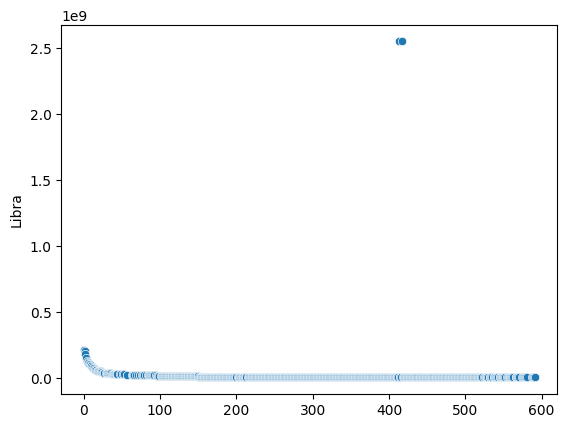

In [41]:
import seaborn as sns

sns.scatterplot(times_masculinos['Libra'])

In [53]:
print(times_masculinos[times_masculinos['Euro']>2.0e9])

               Times         Libra          Euro
413          Estoril  2.550420e+09  3.035000e+09
417  Estrela Amadora  2.550420e+09  3.035000e+09


In [54]:
times_masculinos.loc[times_masculinos['Times']=='Estoril','Libra'] = 1.89e6
times_masculinos.loc[times_masculinos['Times']=='Estoril','Euro'] = 1.89e6*1.19
times_masculinos.loc[times_masculinos['Times']=='Estrela Amadora','Libra'] = 1.85e6
times_masculinos.loc[times_masculinos['Times']=='Estrela Amadora','Euro'] = 1.85e6*1.19

<Axes: ylabel='Euro'>

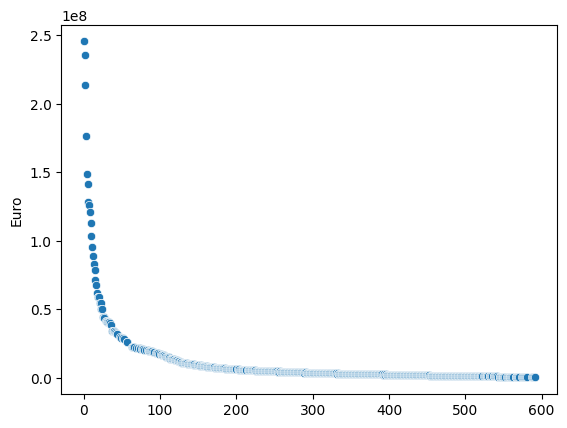

In [56]:
sns.scatterplot(times_masculinos['Euro'])

<Axes: xlabel='Euro', ylabel='Count'>

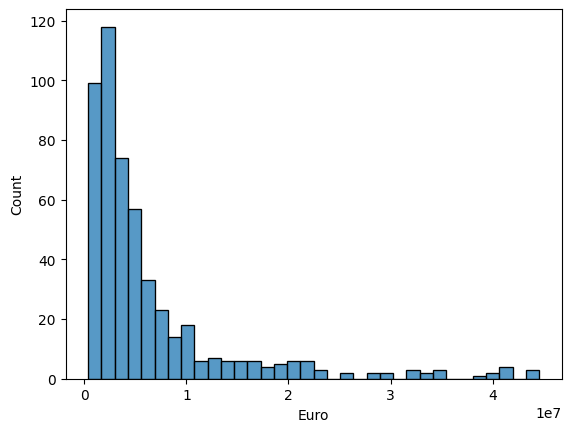

In [63]:
sns.histplot(times_masculinos.loc[times_masculinos['Euro']<=0.5e8,'Euro'])

In [64]:
times_masculinos.to_csv('TimesMasculinos.csv',index=False)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Euro'>

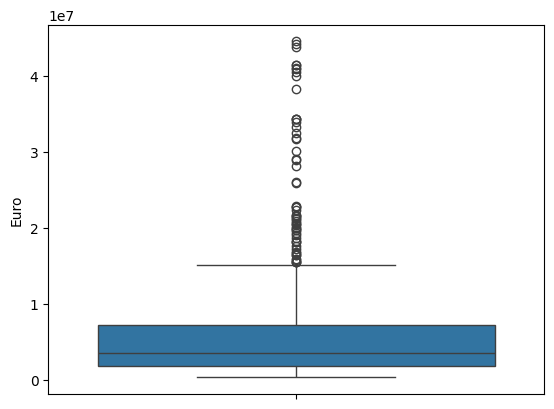

In [68]:
sns.boxplot(times_masculinos.loc[times_masculinos['Euro']<0.5e8,'Euro'])

In [67]:
print(times_masculinos['Euro'].describe())

count    5.400000e+02
mean     1.125691e+07
std      2.576221e+07
min      3.800000e+05
25%      1.970000e+06
50%      3.820000e+06
75%      8.257500e+06
max      2.452900e+08
Name: Euro, dtype: float64
